<a href="https://colab.research.google.com/github/RosemaryYool/Notes-for-AI-in-Science-and-Medicine/blob/main/Copy_of_Random_Walk_MNIST_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from skimage.util import montage

In [4]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [5]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [6]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [7]:
#MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 282824119.70it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 95382436.08it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 97985171.60it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 17921475.79it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [9]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

In [10]:
x = X[10,0,:,:]

In [11]:
x.shape

(28, 28)

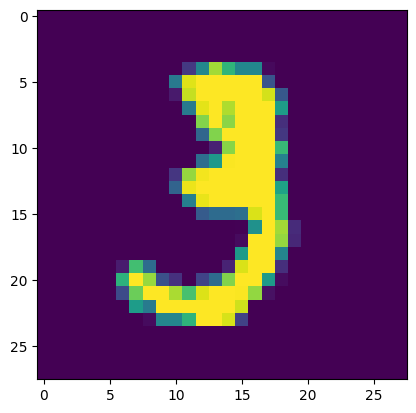

In [12]:
plt.imshow(x)

Idea: Take our vector with dimension 784 and multiply it with a matrix that will send it to a vector that has 10 "slots" or dimensions. 

In [13]:
a = np.random.random((5,1))

In [14]:
a

array([[0.79672126],
       [0.56431452],
       [0.73983543],
       [0.0430764 ],
       [0.68787399]])

In [15]:
a.T

array([[0.79672126, 0.56431452, 0.73983543, 0.0430764 , 0.68787399]])

In [16]:
b = np.random.random((5,5))

In [17]:
b.shape, a.shape

((5, 5), (5, 1))

In [18]:
b = np.random.random((2,5))

In [19]:
b@a

array([[1.7491136 ],
       [1.25266356]])

In [20]:
b.shape, a.shape

((2, 5), (5, 1))

In [21]:
x = np.random.random((784, 1))

In [22]:
x

array([[8.07948572e-01],
       [2.30256082e-01],
       [6.17495774e-01],
       [3.69297361e-01],
       [8.79841388e-02],
       [3.37091123e-01],
       [1.29273095e-01],
       [5.89292589e-01],
       [9.89815003e-01],
       [5.88653313e-01],
       [2.65790046e-01],
       [5.97906175e-01],
       [8.16011170e-01],
       [5.47641462e-01],
       [3.31816705e-01],
       [2.83065837e-01],
       [5.35582014e-01],
       [4.51220524e-02],
       [1.67385258e-01],
       [5.44817517e-01],
       [7.39321755e-01],
       [8.88759256e-01],
       [2.48193177e-01],
       [9.50611740e-01],
       [2.80107815e-01],
       [3.85238211e-01],
       [2.36568259e-01],
       [9.67837378e-02],
       [1.81215100e-01],
       [9.36816066e-01],
       [4.43041380e-01],
       [7.58215338e-01],
       [4.21070735e-01],
       [6.86633263e-01],
       [8.28711482e-01],
       [1.76659194e-01],
       [3.39241415e-01],
       [9.57224001e-01],
       [8.32794387e-02],
       [3.48141153e-01],


In [23]:
m = np.random.random((10,784))

In [24]:
m@x

array([[188.42961962],
       [188.91721067],
       [198.24987916],
       [191.8011578 ],
       [194.94343359],
       [188.66090612],
       [192.44820349],
       [190.95474387],
       [193.0026267 ],
       [194.52641859]])

In [25]:
y = m@x

In [26]:
y.shape

(10, 1)

In [27]:
m.shape, x.shape

((10, 784), (784, 1))

In [28]:
np.max(y)

198.2498791596974

In [29]:
np.argmax(y)

2

In [30]:
X.shape[0]

60000

In [31]:
X=X.reshape(X.shape[0], X.shape[2]*X.shape[3])

In [32]:
X.shape

(60000, 784)

In [33]:
X= X.T

In [34]:
m = np.random.standard_normal((10,784))

In [35]:
m.shape,X.shape

((10, 784), (784, 60000))

In [36]:
X.shape

(784, 60000)

In [37]:
y =m@X

In [38]:
y.shape

(10, 60000)

In [39]:
y = np.argmax(y, axis=0)

In [40]:
y.shape

(60000,)

In [41]:
Y.shape

(60000,)

In [42]:
np.sum(y == Y)

7137

In [43]:
len(Y)

60000

In [44]:
acc = np.sum(y == Y)/len(Y)

In [45]:
acc

0.11895

In [46]:
m = np.random.standard_normal((10,784))

y = m@X

y = np.argmax(y, axis=0)

acc = np.sum(y == Y)/len(Y)

print(acc)

0.11351666666666667


In [47]:
acc_best = 0
m_best = 0

for i in range(100):
    m = np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best: 
        acc_best = acc
        m_best = m
        print(acc_best)

0.121
0.13486666666666666
0.16065
0.16388333333333333
0.17425
0.17606666666666668


In [48]:
acc_best = 0
m_best = 0

for i in range(10000):
    m = m_best + np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best: 
        acc_best = acc
        m_best = m
        print(acc_best)

0.12495
0.14863333333333334
0.1547
0.16648333333333334
0.16895
0.16941666666666666
0.1705
0.1781
0.19361666666666666
0.19465
0.19853333333333334
0.21171666666666666
0.22051666666666667
0.22421666666666668
0.2249
0.22728333333333334
0.2284
0.23705
0.24168333333333333
0.24551666666666666
0.24646666666666667
0.2498
0.2518
0.25295
0.26056666666666667
0.26188333333333336
0.2637833333333333
0.26721666666666666
0.2681
0.2949833333333333
0.2966
0.29828333333333334
0.29868333333333336
0.30088333333333334
0.30496666666666666
0.3062166666666667
0.3114166666666667
0.32481666666666664
0.32843333333333335
0.32985
0.3298833333333333
0.33271666666666666
0.33655
0.33735
0.34918333333333335
0.352
0.35891666666666666
0.3637666666666667
0.36595
0.36643333333333333
0.37043333333333334
0.38226666666666664
0.3852
0.38588333333333336
0.39008333333333334
0.39225
0.39455
0.39636666666666664
0.39648333333333335
0.40015
0.40231666666666666
0.40435
0.40695
0.41223333333333334
0.41508333333333336
0.4181
0.420633333

KeyboardInterrupt: ignored

In [49]:
acc_best = 0
m_best = 0

for i in range(10000):
    m = m_best + np.random.standard_normal((10,784))

    y = m@X

    y = np.argmax(y, axis=0)

    acc = np.sum(y == Y)/len(Y)

    if acc > acc_best: 
        acc_best = acc
        m_best = m
        print(acc_best)

0.08103333333333333
0.0977
0.16325
0.17056666666666667
0.1803
0.18485
0.18951666666666667


KeyboardInterrupt: ignored

In [50]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [51]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [52]:
X.shape

torch.Size([784, 60000])

In [56]:
acc_best = 0
m_best = 0

for i in range(10000):
    m = GPU_data(torch.randn(10,784))

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = torch.sum(y == Y)/len(Y)

    if acc > acc_best: 
        acc_best = acc
        m_best = m
        print(acc_best)

<ipython-input-50-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor(0.0636, device='cuda:0')
tensor(0.1181, device='cuda:0')
tensor(0.1200, device='cuda:0')
tensor(0.1240, device='cuda:0')
tensor(0.1327, device='cuda:0')
tensor(0.1424, device='cuda:0')
tensor(0.1555, device='cuda:0')
tensor(0.1843, device='cuda:0')
tensor(0.1927, device='cuda:0')
tensor(0.1951, device='cuda:0')
tensor(0.2050, device='cuda:0')
tensor(0.2077, device='cuda:0')
tensor(0.2198, device='cuda:0')
tensor(0.2198, device='cuda:0')
tensor(0.2294, device='cuda:0')


In [ ]:
acc_best = 0
m_best = 0

for i in range(100000):
    m = m_best + 0.00001*GPU_data(torch.randn(10,784))

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = torch.sum(y == Y)/len(Y)

    if acc > acc_best: 
        acc_best = acc
        m_best = m
        print(acc_best)

In [60]:
m.shape,X.shape

(torch.Size([10, 784]), torch.Size([784, 60000]))

In [61]:
y = m@X

In [62]:
y.shape

torch.Size([10, 60000])

In [63]:
M = GPU_data(np.random.random((100,10,784)))
M.shape,X.shape

(torch.Size([100, 10, 784]), torch.Size([784, 60000]))

In [64]:
y =M@X

In [65]:
y.shape

torch.Size([100, 10, 60000])

In [66]:
y = torch.argmax((M@X), axis=1) 
score = ((y == Y).sum(1)/len(Y))

In [67]:
score.shape

torch.Size([100])

In [68]:
score

tensor([0.0804, 0.1208, 0.1339, 0.1252, 0.1315, 0.0679, 0.0608, 0.0645, 0.0989,
        0.1344, 0.1514, 0.1026, 0.0915, 0.1036, 0.1158, 0.0874, 0.0789, 0.0950,
        0.1195, 0.1303, 0.1744, 0.0919, 0.0634, 0.0673, 0.0791, 0.0980, 0.1116,
        0.1375, 0.1887, 0.1198, 0.0750, 0.0729, 0.0799, 0.0941, 0.0478, 0.0349,
        0.1041, 0.0454, 0.0887, 0.0916, 0.1088, 0.1396, 0.1103, 0.0883, 0.0893,
        0.0938, 0.0912, 0.1389, 0.1327, 0.1062, 0.1040, 0.1051, 0.1216, 0.0977,
        0.0851, 0.1236, 0.0879, 0.0813, 0.0665, 0.1013, 0.1356, 0.0922, 0.0551,
        0.1467, 0.0840, 0.0743, 0.1094, 0.0972, 0.1494, 0.1320, 0.1083, 0.0466,
        0.1014, 0.0669, 0.0693, 0.0838, 0.1007, 0.0406, 0.0885, 0.1025, 0.1348,
        0.0765, 0.1628, 0.0727, 0.1000, 0.1097, 0.0562, 0.0878, 0.0938, 0.0680,
        0.0761, 0.1049, 0.0912, 0.0761, 0.0975, 0.0606, 0.0670, 0.1094, 0.0395,
        0.1087], device='cuda:0')

In [69]:
s = torch.argsort(score,descending=True)

In [70]:
score[s]

tensor([0.1887, 0.1744, 0.1628, 0.1514, 0.1494, 0.1467, 0.1396, 0.1389, 0.1375,
        0.1356, 0.1348, 0.1344, 0.1339, 0.1327, 0.1320, 0.1315, 0.1303, 0.1252,
        0.1236, 0.1216, 0.1208, 0.1198, 0.1195, 0.1158, 0.1116, 0.1103, 0.1097,
        0.1094, 0.1094, 0.1088, 0.1087, 0.1083, 0.1062, 0.1051, 0.1049, 0.1041,
        0.1040, 0.1036, 0.1026, 0.1025, 0.1014, 0.1013, 0.1007, 0.1000, 0.0989,
        0.0980, 0.0977, 0.0975, 0.0972, 0.0950, 0.0941, 0.0938, 0.0938, 0.0922,
        0.0919, 0.0916, 0.0915, 0.0912, 0.0912, 0.0893, 0.0887, 0.0885, 0.0883,
        0.0879, 0.0878, 0.0874, 0.0851, 0.0840, 0.0838, 0.0813, 0.0804, 0.0799,
        0.0791, 0.0789, 0.0765, 0.0761, 0.0761, 0.0750, 0.0743, 0.0729, 0.0727,
        0.0693, 0.0680, 0.0679, 0.0673, 0.0670, 0.0669, 0.0665, 0.0645, 0.0634,
        0.0608, 0.0606, 0.0562, 0.0551, 0.0478, 0.0466, 0.0454, 0.0406, 0.0395,
        0.0349], device='cuda:0')

In [ ]:
N = 100
M = GPU_data(np.random.random((N,10,784)))

m_best = 0 
acc_best = 0

for i in range(1000000):

    y = torch.argmax((M@X), axis=1) 
    score = ((y == Y).sum(1)/len(Y))
    s = torch.argsort(score,descending=True)
    M = M[s]

    M[1:] = M[0]
    M[N//2:] = 0
    M[1:] += 0.0000001*GPU_data(np.random.random((N-1,10,784)))

    acc = score[s][0].item()

    if acc > acc_best:
        print(acc)
        m_best = M[0]
        acc_best = acc

0.1923166662454605
0.2041500061750412
0.2231166660785675
0.26081666350364685
0.2726333439350128
0.2796500027179718
0.2881166636943817
0.2974500060081482
0.3166666626930237
0.33863332867622375
0.3688333332538605
0.38616666197776794
0.39303332567214966
0.3953000009059906
0.398416668176651
0.4079166650772095
0.4160666763782501
0.41929998993873596
0.42348334193229675
0.4332333505153656
0.4422000050544739
0.45018333196640015
0.4625166654586792
0.4637500047683716
0.4683833420276642
0.47210001945495605
0.47673332691192627
0.48208335041999817
0.48410001397132874
0.48721668124198914
0.4882500171661377
0.4901333451271057
0.4947666823863983
0.49523332715034485
0.49693334102630615
0.4976833462715149
0.5016999840736389
0.5058500170707703
0.5123833417892456
0.5161666870117188
0.5207833647727966
0.5222499966621399
0.5267166495323181
0.5269500017166138
0.5270000100135803
0.5273666977882385
0.5302500128746033
0.5303999781608582
0.5316166877746582
0.5338500142097473
0.5342000126838684
0.5357666611671448